tewa 1: final project
---

https://spotipy.readthedocs.io/en/2.19.0/

In [39]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import json

with open("credentials.json") as fo:
    credentials = json.load(fo)

CLIENT_ID = credentials["CLIENT_ID"]
CLIENT_SECRET = credentials["CLIENT_SECRET"]
TOKEN = credentials["TOKEN"]

In [33]:
CLIENT_ID

'ef5b76301d4f4c4ea0843e0083feec29'

In [34]:
CLIENT_SECRET

'fd94c715570a4a869281ebec48ae076a'

In [40]:
TOKEN

'BQCwUrBqucCX39etXi7hg-y_vd85ZraNm66z22fwQcbJZFGUSHe9eU50Wdb83_HXN9_G4DX_DrklnyuBbOIBfqS0W5ljIp9EAizHChmu0BYIRBuPLVfVnRZM3MS6tuB6cXalsC5aPBBygBMd71UyAmNr9z05pnPiEtYpJrinuL0tXQwS'

In [46]:
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = "user-library-read"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET,scope=scope))

SpotifyOauthError: No redirect_uri. Pass it or set a SPOTIPY_REDIRECT_URI environment variable.

In [42]:
results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

HTTP Error for GET to https://api.spotify.com/v1/me/tracks with Params: {'limit': 20, 'offset': 0, 'market': None} returned 401 due to Missing token


SpotifyException: http status: 401, code:-1 - https://api.spotify.com/v1/me/tracks?limit=20&offset=0:
 Missing token, reason: None

In [36]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,100,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [37]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df

(100, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,87,29PgYEggDV3cDP9QYTogwv
1,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,7h7yPyss4MIBVPXVeF83vg,27,7K54lZmkO9dwqe22N27ftb
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,86,4gzpq5DPGxSnKTe4SA8HAU
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,61,4qmHkMxr6pTWh5Zo74odpH
4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,1McMsnEElThX1knmY4oliG
...,...,...,...,...,...
95,Armin van Buuren,Hold On (Mixed) - Club Mix,49bB6BilfuQycwRTt8faR3,36,0SfsnGyD8FpIN4U4WCkBZ5
96,JVKE,this is what falling in love feels like,4UG2Fm0E98LhE2dlNxiAXx,83,164Uj4eKjl6zTBKfJLFKKK
97,AVIRA,Ocean (Mixed),5LR1lsoTR1rKX1C1mvYlPL,36,7rznn3BVOuA5jyPB275jmS
98,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,83,06HL4z0CvFAxyc27GXpf02


In [15]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
    artist = sp.artist(a_id)
    artist_popularity.append(artist['popularity'])
    artist_genres.append(artist['genres'])
    artist_followers.append(artist['followers']['total'])

In [16]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,87,29PgYEggDV3cDP9QYTogwv,76,[],27536
1,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,7h7yPyss4MIBVPXVeF83vg,27,7K54lZmkO9dwqe22N27ftb,24,[],27
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,86,4gzpq5DPGxSnKTe4SA8HAU,92,"[permanent wave, pop]",35437564
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,61,4qmHkMxr6pTWh5Zo74odpH,59,"[art rock, folk rock, mellow gold, new wave po...",227249
4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,1McMsnEElThX1knmY4oliG,91,[pop],16179831


In [17]:
track_features = []
for t_id in track_df['track_id']:
    af = sp.audio_features(t_id)
    track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
    for feat in item:
        tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.577,0.450,0,-8.516,0,0.0834,0.35700,0,0.1110,0.830,205.863,audio_features,52xJxFP6TqMuO4Yt0eOkMz,spotify:track:52xJxFP6TqMuO4Yt0eOkMz,https://api.spotify.com/v1/tracks/52xJxFP6TqMu...,https://api.spotify.com/v1/audio-analysis/52xJ...,216120,4
1,0.887,0.633,8,-10.453,1,0.0660,0.06290,0.922,0.0637,0.849,130.023,audio_features,7h7yPyss4MIBVPXVeF83vg,spotify:track:7h7yPyss4MIBVPXVeF83vg,https://api.spotify.com/v1/tracks/7h7yPyss4MIB...,https://api.spotify.com/v1/audio-analysis/7h7y...,176363,4
2,0.588,0.701,9,-6.390,1,0.0402,0.00813,0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,228000,4
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.1060,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.563,0.664,9,-5.044,1,0.1540,0.33500,0,0.0849,0.688,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4


In [18]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        100 non-null    object
 1   track_name         100 non-null    object
 2   track_id           100 non-null    object
 3   track_popularity   100 non-null    int64 
 4   artist_id          100 non-null    object
 5   artist_popularity  100 non-null    int64 
 6   artist_genres      100 non-null    object
 7   artist_followers   100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      100 non-null    float64
 1   energy            100 non-null    float64
 2   loudness          100 non-null    float64
 3   speechiness       100 non-nu

In [19]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        100 non-null    string
 1   track_name         100 non-null    string
 2   track_id           100 non-null    string
 3   track_popularity   100 non-null    int64 
 4   artist_id          100 non-null    string
 5   artist_popularity  100 non-null    int64 
 6   artist_genres      100 non-null    object
 7   artist_followers   100 non-null    int64 
dtypes: int64(3), object(1), string(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      100 non-null    float64 
 1   energy            100 non-null    float64 
 2   loudness          100 non-null    float64 
 3   speechiness 

In [20]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
24,abcdefu,GAYLE
8,Woman,Doja Cat
16,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons
12,THATS WHAT I WANT,Lil Nas X
60,The Motto,Tiësto
54,Bad Habits,Ed Sheeran
20,STAY (with Justin Bieber),The Kid LAROI
48,Cold Heart - PNAU Remix,Elton John
4,good 4 u,Olivia Rodrigo
38,Shivers,Ed Sheeran


In [21]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
54,96173363,96,Ed Sheeran,"['pop', 'uk pop']"
50,62907605,98,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
32,61062299,93,Billie Eilish,"['art pop', 'electropop', 'pop']"
44,59848830,96,Justin Bieber,"['canadian pop', 'pop']"
98,52325184,98,Taylor Swift,['pop']
68,47298998,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
16,39679227,93,Imagine Dragons,"['modern rock', 'rock']"
76,37157408,90,Adele,"['british soul', 'pop', 'pop soul', 'uk pop']"
34,36681503,91,Post Malone,"['dfw rap', 'melodic rap', 'rap']"
2,35437564,92,Coldplay,"['permanent wave', 'pop']"


In [22]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                   24
trance                16
edm                   15
progressive house     15
pop dance             14
mellow gold           13
folk rock             13
rock                  13
new wave pop          12
power pop             12
pub rock              12
roots rock            12
art rock              12
uplifting trance       9
rap                    8
progressive trance     7
dance pop              7
hip hop                7
canadian pop           5
dutch trance           5
dtype: int64

Text(0.5, 1.0, 'Top genres')

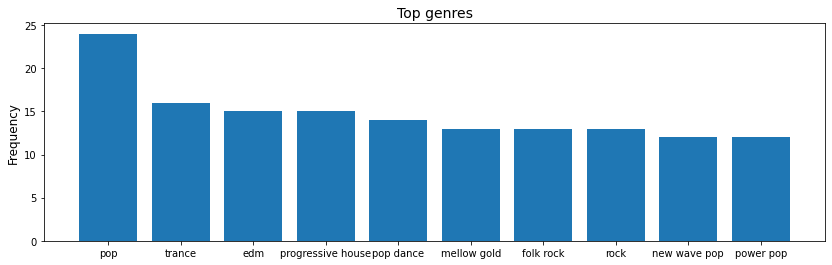

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [24]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
    for index, row in by_art_fol.iterrows():
        if genre in row['artist_genres']:
            top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
            break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Tiësto,trance
2,Tiësto,edm
3,Armin van Buuren,progressive house
4,Tiësto,pop dance
5,Elton John,mellow gold
6,Elvis Costello & The Attractions,folk rock
7,Imagine Dragons,rock
8,Elvis Costello & The Attractions,new wave pop
9,Elvis Costello & The Attractions,power pop


In [25]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
      for index, row in by_track_pop.iterrows():
        if genre in row['artist_genres']:
            top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
            break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Woman,91,Doja Cat,pop
1,The Motto,90,Tiësto,trance
2,The Motto,90,Tiësto,edm
3,Bloodstream (Mixed),38,Ferry Corsten,progressive house
4,The Motto,90,Tiësto,pop dance
5,Cold Heart - PNAU Remix,90,Elton John,mellow gold
6,Pump It Up - 2021 Remaster,61,Elvis Costello & The Attractions,folk rock
7,Enemy (with JID) - from the series Arcane Leag...,91,Imagine Dragons,rock
8,Pump It Up - 2021 Remaster,61,Elvis Costello & The Attractions,new wave pop
9,Pump It Up - 2021 Remaster,61,Elvis Costello & The Attractions,power pop


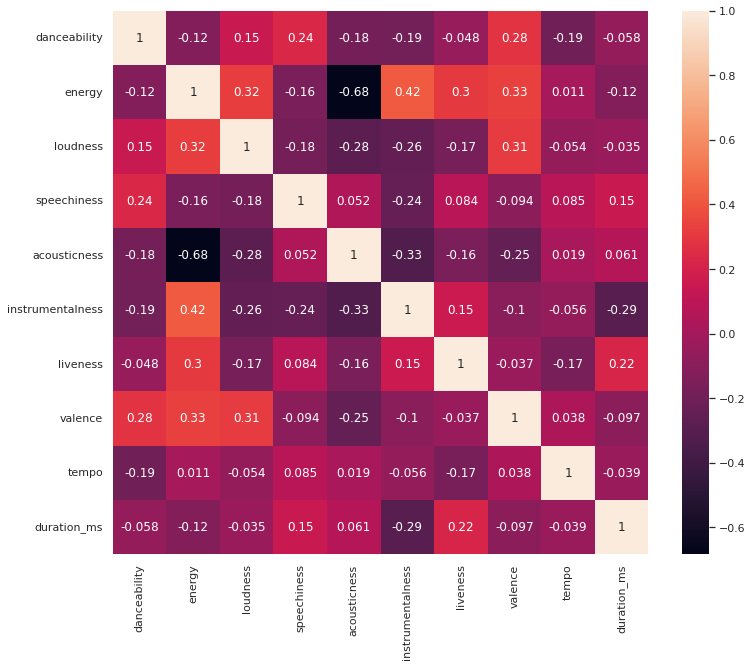

In [26]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

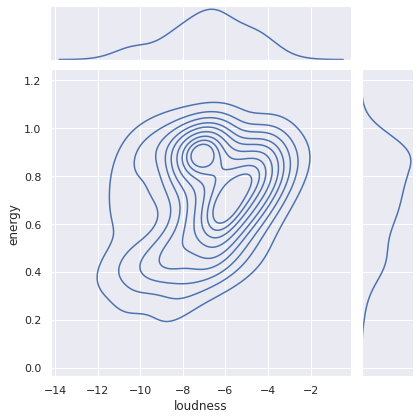

In [27]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")